## 나이브 베이스 

In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score

customer = pd.read_csv("data/customerChurn.csv")

In [2]:
customer.head()

,sex,age,Recency,Frequency,Monetary,Churn
0,M,11,4,41,1268981,No
1,M,10,18,15,843996,No
2,F,38,16,41,1755623,No
3,M,13,8,14,862172,No
4,F,20,22,42,748430,No


In [3]:
X = customer.drop('Churn', axis=1)
y = customer['Churn']

### One hot encoding

In [4]:
X_ohe = pd.get_dummies(X)
X_ohe.head()

,age,Recency,Frequency,Monetary,sex_F,sex_M
0,11,4,41,1268981,0,1
1,10,18,15,843996,0,1
2,38,16,41,1755623,1,0
3,13,8,14,862172,0,1
4,20,22,42,748430,1,0


### 학습 데이터, 테스트 데이터 나누기

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y)

### 모형 학습 및 예측

In [6]:
gnb = GaussianNB() 
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test) 
y_pred

array(['No', 'Yes', 'Yes', ..., 'No', 'Yes', 'No'], dtype='<U3')

### 성과 측정 (정확도)

In [7]:
gnb.score(X_test,y_test)

0.8912

### log loss 계산해 보기

In [8]:
y_prob = gnb.predict_proba(X_test)

from sklearn.metrics import log_loss

log_loss(y_test, y_prob)

0.24581623726221014

### 5겹 교차검증 

In [9]:
gnb = GaussianNB() 

scores = cross_val_score(gnb, X_ohe, y, scoring='roc_auc', cv=5)
scores.mean()

0.962396

## 서포트 벡터 머신

In [10]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score

customer = pd.read_csv("data/customerChurn.csv")

In [11]:
customer.head()

,sex,age,Recency,Frequency,Monetary,Churn
0,M,11,4,41,1268981,No
1,M,10,18,15,843996,No
2,F,38,16,41,1755623,No
3,M,13,8,14,862172,No
4,F,20,22,42,748430,No


In [12]:
X = customer.drop(['Churn', 'sex'], axis=1)
y = customer['Churn']

### 변수 표준화

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_s = pd.DataFrame(scaler.fit_transform(X))

In [14]:
X_s.head()

,0,1,2,3
0,-1.555877,-1.583993,1.631371,1.130492
1,-1.667845,-0.057211,-0.330064,0.374340
2,1.467244,-0.275322,1.631371,1.996346
3,-1.331942,-1.147769,-0.405504,0.406679
4,-0.548170,0.379013,1.706811,0.204305


In [15]:
X_s.columns = ['age', 'Recency', 'Frequency', 'Monetary']

In [16]:
X_s['sex'] = customer['sex']

In [17]:
X_s.head()

,age,Recency,Frequency,Monetary,sex
0,-1.555877,-1.583993,1.631371,1.130492,M
1,-1.667845,-0.057211,-0.330064,0.374340,M
2,1.467244,-0.275322,1.631371,1.996346,F
3,-1.331942,-1.147769,-0.405504,0.406679,M
4,-0.548170,0.379013,1.706811,0.204305,F


### one hot encoding

In [18]:
X_ohe = pd.get_dummies(X_s)
X_ohe.head()

,age,Recency,Frequency,Monetary,sex_F,sex_M
0,-1.555877,-1.583993,1.631371,1.130492,0,1
1,-1.667845,-0.057211,-0.330064,0.374340,0,1
2,1.467244,-0.275322,1.631371,1.996346,1,0
3,-1.331942,-1.147769,-0.405504,0.406679,0,1
4,-0.548170,0.379013,1.706811,0.204305,1,0


### 서포트 벡터 머신 모형 학습

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y)
linear_svm = LinearSVC(C=1) 
linear_svm.fit(X_train,y_train)

LinearSVC(C=1)

In [20]:
print("Predictions: {}".format(linear_svm.predict(X_test))) 
print("Accuracy: {}".format(linear_svm.score(X_test, y_test)))

Predictions: ['No' 'Yes' 'Yes' ... 'No' 'Yes' 'No']
Accuracy: 0.9408


In [21]:
from sklearn.model_selection import cross_val_score 

linear_svm = LinearSVC(C=1)
scores = cross_val_score(linear_svm, X_ohe, y, scoring='roc_auc',cv=5)
scores.mean()

0.9842504

### 하이퍼 파라미터 튜닝

- 1차 시도

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'C': [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]}]

linear_svm = LinearSVC(max_iter=10000)

grid_search = GridSearchCV(
    linear_svm, 
    param_grid, 
    cv=5, 
    scoring='roc_auc',
    return_train_score=True)

grid_search.fit(X_ohe,y)

C:\Users\eunbi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\eunbi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=5, estimator=LinearSVC(max_iter=10000),
             param_grid=[{'C': [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]}],
             return_train_score=True, scoring='roc_auc')

In [23]:
grid_search.best_params_

{'C': 15}

- 2차 시도

In [24]:
param_grid = [{'C': [11, 12, 13, 14, 15, 16, 17, 18, 19]}]

linear_svm = LinearSVC(max_iter=10000)

grid_search = GridSearchCV(
    linear_svm, 
    param_grid, 
    cv=5, 
    scoring='roc_auc',
    return_train_score=True)

grid_search.fit(X_ohe,y)

GridSearchCV(cv=5, estimator=LinearSVC(max_iter=10000),
             param_grid=[{'C': [11, 12, 13, 14, 15, 16, 17, 18, 19]}],
             return_train_score=True, scoring='roc_auc')

In [25]:
grid_search.best_params_

{'C': 12}

In [26]:
linear_svm = LinearSVC(C=grid_search.best_params_['C'], max_iter=10000)

scores = cross_val_score(linear_svm, X_ohe, y, scoring='roc_auc',cv=5)
scores.mean()

0.9842511999999999

### 비선형 서포트 벡터 머신

In [27]:
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

In [28]:
X, y = make_moons(n_samples = 100, noise=0.15) 

In [29]:
X[:5]

array([[ 0.9745363 , -0.46105071],
       [ 0.92940094,  0.37506622],
       [-0.32912189,  0.58514298],
       [ 0.14682294, -0.21529133],
       [ 0.49850838,  0.69971605]])

In [30]:
y[:5]

array([1, 0, 1, 1, 0], dtype=int64)

In [31]:
scaler = StandardScaler() 
X = scaler.fit_transform(X) 

In [32]:
svm_clf = SVC(kernel="poly", degree=3, coef0=1, C=5) 

X_train, X_test, y_train, y_test = train_test_split(X, y) 

svm_clf.fit(X_train,y_train)

SVC(C=5, coef0=1, kernel='poly')

In [33]:
y_pred = svm_clf.predict(X_test)
print("Accuracy: {}".format(svm_clf.score(X_test, y_test)))

Accuracy: 0.96


In [34]:
precision_score(y_test,y_pred)

1.0

In [35]:
recall_score(y_test,y_pred)

0.9333333333333333

In [36]:
f1_score(y_test,y_pred)

0.9655172413793104

In [37]:
scores = cross_val_score(svm_clf, X, y, scoring='roc_auc',cv=5)
scores.mean()

1.0

- 결정 경계(decision boundary) 시각화

In [38]:
import numpy as np
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt

In [39]:
pca = PCA(n_components = 2)
rng = np.random.RandomState(0)
pca.fit(X,y)
U2 = pca.fit_transform(X,y) 
svm_clf.fit(U2,y)

SVC(C=5, coef0=1, kernel='poly')

- 그래프 그리기 위한 x축, y축 준비

In [40]:
h = 0.2
x_min, x_max = U2[:,0].min() - 1, U2[:, 0].max() + 1 
y_min, y_max = U2[:,1].min() - 1, U2[:, 1].max() + 1 
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h), 
    np.arange(y_min, y_max, h))

- 결정 경계 시각화

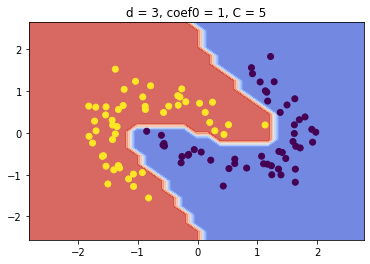

In [41]:
Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
## np.ravel() makes multiple dimension array into one dimension

Z = Z.reshape(xx.shape) 
plt.contourf(xx,yy,Z,cmap=plt.cm.coolwarm, alpha=0.8) 
plt.scatter(U2[:,0],U2[:,1],c=y)
plt.title("d = 3, coef0 = 1, C = 5")
plt.show()

- degree = 5로만 변경

In [42]:
svm_clf = SVC(kernel="poly", degree=5, coef0=1, C=5) 
svm_clf.fit(U2,y)

SVC(C=5, coef0=1, degree=5, kernel='poly')

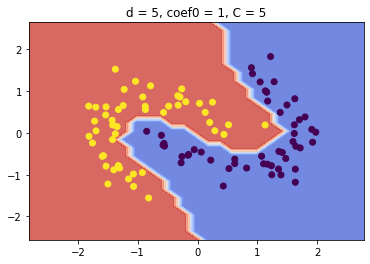

In [43]:
Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape) 
plt.contourf(xx,yy,Z,cmap=plt.cm.coolwarm, alpha=0.8) 
plt.scatter(U2[:,0],U2[:,1],c=y)
plt.title("d = 5, coef0 = 1, C = 5")
plt.show()

### RBF 커널

In [44]:
rbf_svm_clf = SVC(kernel="rbf", gamma=5, C=0.001) 
X_train, X_test, y_train, y_test = train_test_split(X, y) 
rbf_svm_clf.fit(X_train,y_train)

SVC(C=0.001, gamma=5)

In [45]:
y_pred = rbf_svm_clf.predict(X_test)
print("Accuracy: {}".format(rbf_svm_clf.score(X_test, y_test)))

Accuracy: 0.48


In [46]:
precision_score(y_test,y_pred)
recall_score(y_test,y_pred)
f1_score(y_test,y_pred)

0.6486486486486487

In [47]:
cross_val_score(rbf_svm_clf, X, y, scoring='roc_auc',cv=5)

array([0.99, 1.  , 1.  , 1.  , 1.  ])

In [48]:
rbf_svm_clf.fit(U2,y)

SVC(C=0.001, gamma=5)

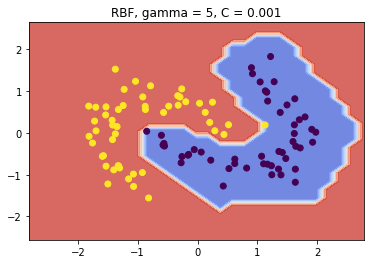

In [49]:
Z = rbf_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape) 
plt.contourf(xx,yy,Z,cmap=plt.cm.coolwarm, alpha=0.8) 
plt.scatter(U2[:,0],U2[:,1],c=y)
plt.title("RBF, gamma = 5, C = 0.001")
plt.show()

### SVM 회귀

- LinearSVR

In [50]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

boston = pd.read_csv("data/boston.csv")

X = boston.iloc[:,1:-1]
y = boston["medv"]
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon = 5, tol=0.1, C=1, max_iter=100000)
svm_reg.fit(X_train, y_train)

y_pred = svm_reg.predict(X_test)

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_pred))

5.231058470911232

In [52]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svm_reg, X, y, scoring='neg_mean_squared_error',cv=5)
np.sqrt(-scores.mean())

6.790709291069076

- SVR 

In [53]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="poly", degree=2, coef0=1, tol=0.001, C=5, epsilon=0.1) 
svm_poly_reg.fit(X_train,y_train)

y_pred = svm_poly_reg.predict(X_test)

from sklearn.metrics import mean_squared_error 
np.sqrt(mean_squared_error(y_test,y_pred))

8.44320721664315

In [54]:
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(svm_poly_reg, X, y, scoring='neg_mean_squared_error',cv=5)
np.sqrt(-scores.mean())

8.376842274549796

## 연습문제

In [55]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [56]:
hr = pd.read_csv('data/HR.csv')

In [57]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


변수 명	내용	구분

Age	나이	

Attrition	이직여부, Yes / No	(목표 변수)

BusinessTravel	출장 빈도(범주)
 - Travel_Rarely        
 - Travel_Frequently     
 - Non-Travel
 
DailyRate 기준 일급

Department	현 부서	

DistanceFromHome	집-직장 거리(마일)	

Education	교육수준(범주)
 - 1 Below College
 - 2 College
 - 3 Bachelor
 - 4 Master
 - 5 Doctor

EducationField	전공 (범주)
 - Life Sciences      
 - Medical             
 - Marketing           
 - Technical Degree    
 - Other                
 - Human Resources      

EmployeeCount (값이 전부 1임)

EmployeeNumber	사번	

EnvironmentSatisfaction	근무환경에 대한 만족도(범주)
 - 1 Low
 - 2 Good
 - 3 Excellent
 - 4 Outstanding
 
Gender	성별	(범주)
 - Male
 - Female

HourlyRate 기준 시급

JobInvolvement	직무 적극성(참여도) (범주)	
 - 1 Low
 - 2 Medium
 - 3 High
 - 4 Very High

JobLevel (범주)
 - 1
 - 2
 - 3
 - 4
 - 5
 
JobRole	직무	(범주)
 - Sales Executive              
 - Research Scientist           
 - Laboratory Technician        
 - Manufacturing Director       
 - Healthcare Representative    
 - Manager                      
 - Sales Representative          
 - Research Director             
 - Human Resources              

JobSatisfaction	직무 만족도 (범주)
 - 1 Low
 - 2 Medium
 - 3 High
 - 4 Very High

MaritalStatus	결혼상태 (범주)
 - Married    
 - Single      
 - Divorced    

MonthlyIncome	월급	

MonthlyRate 기준 월급여 

NumCompaniesWorked	현재까지 근무한 회사 수	

Over18 18세 이상 여부 (범주, 전부 Y)

OverTime	야근여부 (범주)
 - No     
 - Yes     

PercentSalaryHike	전년대비 급여인상율(%)

PerformanceRating 성과 등급 (범주)
 - 3    
 - 4    
 
RelationshipSatisfaction	동료와의 관계 만족도 (범주)
 - 1 Low
 - 2 Medium
 - 3 High
 - 4 Very High

StandardHours (값이 전부 80임)

StockOptionLevel	스톡옵션 수준 (범주)
 - 0
 - 1
 - 2
 - 3
 
TotalWorkingYears	총 근무 연수	

TrainingTimesLastYear	전년 교육훈련 횟수	

WorkLifeBalance	워라밸. 일-삶 균형도 (범주)
 - 1 Bad
 - 2 Good
 - 3 Better
 - 4 Best
 
YearsAtCompany	현직장 근무 연수	

YearsInCurrentRole	현직무 연수	

YearsSinceLastPromotion 마지막 승진 연수

YearsWithCurrManager	현 팀장과 근무한 연수	

In [58]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

- 범주형인데 숫자로 인식하고 있는 컬럼을 범주형으로 변환

WorkLifeBalance
StockOptionLevel
RelationshipSatisfaction
PerformanceRating
JobSatisfaction  
JobLevel
JobInvolvement
EnvironmentSatisfaction
Education

- 범주형인데 문자로 인식하고 있는 컬럼을 범주형으로 변환

Attrition
BusinessTravel
Department
EducationField
Gender
JobRole 
MaritalStatus
Over18
OverTime

In [59]:
for col in ['WorkLifeBalance', 'StockOptionLevel', 'RelationshipSatisfaction', 'PerformanceRating', 'JobSatisfaction', 'JobLevel', 'JobInvolvement', 'EnvironmentSatisfaction', 'Education', 'Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']:
    hr[col] = hr[col].astype('category')

In [60]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   category
 2   BusinessTravel            1470 non-null   category
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   category
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   category
 7   EducationField            1470 non-null   category
 8   EmployeeCount             1470 non-null   int64   
 9   EmployeeNumber            1470 non-null   int64   
 10  EnvironmentSatisfaction   1470 non-null   category
 11  Gender                    1470 non-null   category
 12  HourlyRate                1470 non-null   int64   
 13  JobInvolvement            1470 non-null   catego

- 의미 없는 변수만 제거

In [61]:
X = hr.drop(['Attrition', 'EmployeeCount' ,'EmployeeNumber', 'StandardHours', 'Over18'], axis=1)
y = hr['Attrition']

- 범주형 변수이외의 수치형 변수 표준화

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_numeric = X[['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears' ,'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
X_cat = X.drop(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears' ,'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], axis=1)
X_s = pd.DataFrame(scaler.fit_transform(X_numeric))

In [63]:
X_s.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.446350,0.742527,-1.010909,1.383138,-0.108350,0.726020,2.125136,-1.150554,-0.421642,-2.171982,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-1.297775,-0.147150,-0.240677,-0.291719,1.488876,-0.678049,2.129306,-0.164511,0.155707,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1.414363,-0.887515,1.284725,-0.937654,-1.674841,1.324226,-0.057267,-0.550208,0.155707,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,1.461466,-0.764121,-0.486709,-0.763634,1.243211,-0.678049,-1.150554,-0.421642,0.155707,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,-0.524295,-0.887515,-1.274014,-0.644858,0.325900,2.525591,-0.877232,-0.678774,0.155707,-0.817734,-0.615492,-0.058285,-0.595227


In [64]:
X_s.columns = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears' ,'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

- one hot encoding

In [65]:
X_s_c = pd.concat([X_s, X_cat], axis=1)

In [66]:
X_s_c.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,...,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
0,0.446350,0.742527,-1.010909,1.383138,-0.108350,0.726020,2.125136,-1.150554,-0.421642,-2.171982,...,3,2,Sales Executive,4,Single,Yes,3,1,0,1
1,1.322365,-1.297775,-0.147150,-0.240677,-0.291719,1.488876,-0.678049,2.129306,-0.164511,0.155707,...,2,2,Research Scientist,2,Married,No,4,4,1,3
2,0.008343,1.414363,-0.887515,1.284725,-0.937654,-1.674841,1.324226,-0.057267,-0.550208,0.155707,...,2,1,Laboratory Technician,3,Single,Yes,3,2,0,3
3,-0.429664,1.461466,-0.764121,-0.486709,-0.763634,1.243211,-0.678049,-1.150554,-0.421642,0.155707,...,3,1,Research Scientist,3,Married,Yes,3,3,0,3
4,-1.086676,-0.524295,-0.887515,-1.274014,-0.644858,0.325900,2.525591,-0.877232,-0.678774,0.155707,...,3,1,Laboratory Technician,2,Married,No,3,4,1,3


In [67]:
X_ohe = pd.get_dummies(X_s_c)
X_ohe.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,...,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,0.446350,0.742527,-1.010909,1.383138,-0.108350,0.726020,2.125136,-1.150554,-0.421642,-2.171982,...,0,0,1,0,0,0,1,0,0,0
1,1.322365,-1.297775,-0.147150,-0.240677,-0.291719,1.488876,-0.678049,2.129306,-0.164511,0.155707,...,0,1,0,1,0,0,0,0,1,0
2,0.008343,1.414363,-0.887515,1.284725,-0.937654,-1.674841,1.324226,-0.057267,-0.550208,0.155707,...,0,0,1,0,0,0,0,0,1,0
3,-0.429664,1.461466,-0.764121,-0.486709,-0.763634,1.243211,-0.678049,-1.150554,-0.421642,0.155707,...,1,0,1,0,0,0,0,0,1,0
4,-1.086676,-0.524295,-0.887515,-1.274014,-0.644858,0.325900,2.525591,-0.877232,-0.678774,0.155707,...,0,1,0,1,0,0,0,0,1,0


- 나이브 베이스 학습

In [68]:
gnb = GaussianNB() 

scores = cross_val_score(gnb, X_ohe, y, scoring='roc_auc', cv=5)
scores.mean()

0.7689959835736268

- LinearSVC 학습

In [69]:
linear_svm = LinearSVC(C=1, max_iter = 10000)
scores = cross_val_score(linear_svm, X_ohe, y, scoring='roc_auc',cv=5)
scores.mean()

0.8573678759657783

In [70]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'C': [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]}]

linear_svm = LinearSVC(max_iter=10000)

grid_search = GridSearchCV(
    linear_svm, 
    param_grid, 
    cv=5, 
    scoring='roc_auc',
    return_train_score=True)

grid_search.fit(X_ohe,y)

C:\Users\eunbi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\eunbi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\eunbi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\eunbi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\eunbi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

C:\Users\eunbi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\eunbi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\eunbi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\eunbi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\eunbi\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

GridSearchCV(cv=5, estimator=LinearSVC(max_iter=10000),
             param_grid=[{'C': [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]}],
             return_train_score=True, scoring='roc_auc')

In [71]:
grid_search.best_params_

{'C': 1}

In [ ]:
import scipy.stats as stats
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'C': stats.uniform(0, 5)}

linear_svm = LinearSVC(max_iter=10000)

n_iter_search = 50
random_search = RandomizedSearchCV(linear_svm, 
                                   param_distributions=param_dist,
                                   n_iter=n_iter_search,
                                   scoring='roc_auc',
                                   return_train_score=True
                                  )

random_search.fit(X_ohe,y)

In [ ]:
random_search.best_params_

In [ ]:
linear_svm = LinearSVC(C=random_search.best_params_['C'], max_iter = 10000)
scores = cross_val_score(linear_svm, X_ohe, y, scoring='roc_auc',cv=5)
scores.mean()

- SVC 학습

In [ ]:
rbf_svm_clf = SVC(kernel="rbf", gamma=5, C=0.001) 
scores = cross_val_score(rbf_svm_clf, X_ohe, y, scoring='roc_auc',cv=5)
scores.mean()

In [ ]:
import scipy.stats as stats
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'C': stats.uniform(0, 100),
              'gamma': stats.uniform(1,10)
             }

rbf_svm_clf = SVC(kernel="rbf") 

n_iter_search = 100
random_search = RandomizedSearchCV(rbf_svm_clf, 
                                   param_distributions=param_dist,
                                   n_iter=n_iter_search,
                                   scoring='roc_auc',
                                   return_train_score=True
                                  )

random_search.fit(X_ohe,y)

In [ ]:
random_search.best_params_

In [ ]:
rbf_svm_clf = SVC(kernel="rbf", gamma=random_search.best_params_['gamma'], C=random_search.best_params_['C']) 
scores = cross_val_score(rbf_svm_clf, X_ohe, y, scoring='roc_auc',cv=5)
scores.mean()